# 平移变换

## 加载图像

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

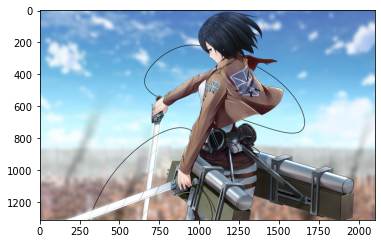

In [2]:
img = cv.imread(r'./images/target.jpg')
show_img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(show_img)
plt.show()

## 加载平移矩阵

In [8]:
matrix = np.float32([[1, 0, 100], [0, 1, 50]])


In [10]:
target_img = cv.warpAffine(img, matrix, (img.shape[1], img.shape[0]))

## 结果

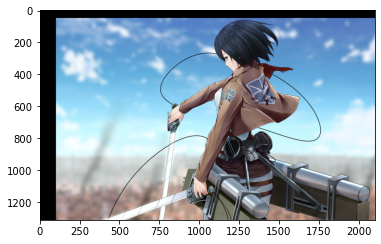

In [11]:
target_img = cv.cvtColor(target_img, cv.COLOR_BGR2RGB)
plt.imshow(target_img)
plt.show()

# 旋转

In [13]:
m = cv.getRotationMatrix2D((img.shape[1] / 2,img.shape[0] / 2),45,0.6)

In [ ]:
target_img = cv.warpAffine(img, m, (img.shape[1], img.shape[0]))
target_img = cv.cvtColor(target_img, cv.COLOR_BGR2RGB)
plt.imshow(target_img)
plt.show()
